In [59]:
from rdkit import Chem
import pandas as pd
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import MolDrawing, DrawingOptions
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import re
import os, sys
import seaborn as sns
from rdkit.Chem import AllChem, Draw
from rdkit.Chem.Draw import IPythonConsole


# --- Matplotlib style to match MW plot ---
mpl.rcParams.update({
    "font.family": "sans-serif",
    "font.sans-serif": ["DejaVu Sans"],
    "axes.spines.top": False,
    "axes.spines.right": False,
    "axes.linewidth": 1.2,
    "axes.grid": True,
    "grid.color": "#E0E0E0",
    "grid.linestyle": "--",
    "grid.linewidth": 0.8,
    "legend.frameon": True,
    "legend.fancybox": True,
    "legend.framealpha": 0.8,
    "legend.facecolor": "white",
    "legend.edgecolor": "#E0E0E0",
    "figure.dpi": 340,
    "axes.labelsize": 18,
    "xtick.labelsize": 18,
    "ytick.labelsize": 18,
    "legend.fontsize": 18
})


# Parse and derivitize Franklin et al. 

In [1]:
import pandas as pd
df = pd.read_excel('../data/raw/Franklin/Franklin_Volatility_Parameterization_SMILES_BA_HS-TMS.xlsx')

In [2]:
goamazon_data = df[df['Notes'].values == 'GoAmazon'][df.columns[0:3]]
goamazon_data.to_csv('../data/raw/Franklin/goamazon.csv', index=False)
goamazon_data['SMILES'].to_csv('../data/raw/Franklin/goamazon_SMILES.csv', index=False)

In [3]:
ga_smiles = pd.read_csv('../data/raw/Franklin/goamazon_SMILES.csv')

<Figure size 1200x800 with 0 Axes>

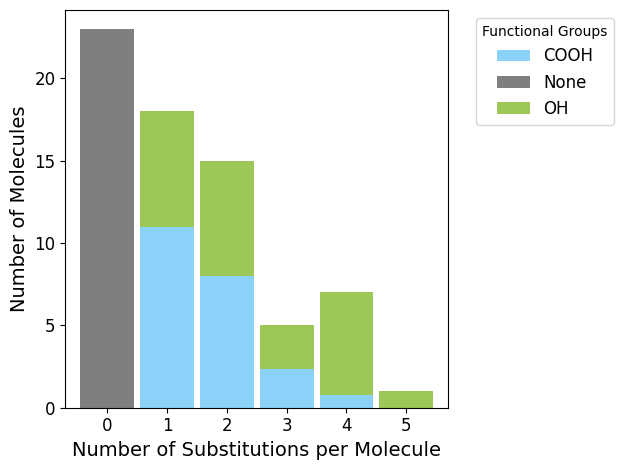

In [4]:
run ../src/data/derivitization_tests/make_TMS_derivative_v3.py -i '../data/raw/Franklin/goamazon_SMILES.csv' -o '../data/processed/franklin_goamazon_der3-SMILES.csv'  

In [5]:
der_goamazon = pd.read_csv('../data/processed/franklin_goamazon_der3-SMILES.csv')

In [6]:
der_goamazon = der_goamazon.reset_index(drop=True)
goamazon_data = goamazon_data.reset_index(drop=True)
s1 = der_goamazon['Total_Replacements'].reset_index(drop=True)
s2 = goamazon_data['TMS'].reset_index(drop=True)

# Element-wise comparison (returns a Series of True/False for each row)
comparison = s1 == s2
print("Row-wise equality:")
print(comparison)

# Percentage of equality
percentage_equal = comparison.mean() * 100
print(f"\nPercentage of equality: {percentage_equal:.2f}%")

# Find all mismatched rows
mismatches = s1[~comparison]
mismatched_s2 = s2[~comparison]

if not mismatches.empty:
    print("\nMismatched rows:")
    for reset_index in mismatches.index:
        # Map reset indices back to the original indices
        original_index = der_goamazon.index[reset_index]
        
        # Retrieve original 'SMILES' from the DataFrames
        smiles1 = der_goamazon.loc[original_index, 'Modified_SMILES']
        smiles2 = goamazon_data.loc[original_index, 'SMILES']

        # Print mismatch details
        print(f"Index {reset_index} (original index {original_index}): s1 (sim) = {mismatches.loc[reset_index]}, "
              f"s2 (real) = {mismatched_s2.loc[reset_index]}, SMILES s1 (sim) = {smiles1}, SMILES s2 (real) = {smiles2}")
else:
    print("\nNo mismatches found.")


Row-wise equality:
0      True
1      True
2      True
3      True
4      True
      ...  
64     True
65     True
66    False
67     True
68     True
Length: 69, dtype: bool

Percentage of equality: 95.65%

Mismatched rows:
Index 7 (original index 7): s1 (sim) = 1, s2 (real) = 0.0, SMILES s1 (sim) = CC1CC(OC(=O)c2ccccc2O[Si](C)(C)C)CC(C)(C)C1, SMILES s2 (real) = O=C(OC1CC(C)(C)CC(C)C1)C2=CC=CC=C2O
Index 29 (original index 29): s1 (sim) = 1, s2 (real) = 0.0, SMILES s1 (sim) = COc1cc(OC)c(C(C)=O)c(O[Si](C)(C)C)c1, SMILES s2 (real) = OC1=CC(OC)=CC(OC)=C1C(C)=O
Index 66 (original index 66): s1 (sim) = 2, s2 (real) = 0.0, SMILES s1 (sim) = C[Si](C)(C)OC(=O)c1ccccc1C(=O)O[Si](C)(C)C, SMILES s2 (real) = O=C(C1=CC=CC=C1C(O)=O)O


In [7]:
mismatches = s1[~comparison]
mismatches.values

array([1, 1, 2])

# Test version 2 on Franklin: include all OH sub

In [8]:
run ../src/data/derivitization_tests/make_TMS_derivative_v2-.py -i '../data/raw/Franklin/goamazon_SMILES.csv' -o '../data/processed/franklin_goamazon_der2-SMILES.csv'  

Exception: File `'../src/data/make_TMS_derivative_v2-.py'` not found.

In [ ]:
der2_goamazon = pd.read_csv('../data/processed/franklin_goamazon_der2-SMILES.csv')

In [ ]:
der2_goamazon = der2_goamazon.reset_index(drop=True)
goamazon_data = goamazon_data.reset_index(drop=True)
s1 = der2_goamazon['Total_Replacements'].reset_index(drop=True)
s2 = goamazon_data['TMS'].reset_index(drop=True)

# Element-wise comparison (returns a Series of True/False for each row)
comparison = s1 == s2
print("Row-wise equality:")
print(comparison)

# Percentage of equality
percentage_equal = comparison.mean() * 100
print(f"\nPercentage of equality: {percentage_equal:.2f}%")

# Find all mismatched rows
mismatches = s1[~comparison]
mismatched_s2 = s2[~comparison]

if not mismatches.empty:
    print("\nMismatched rows:")
    for reset_index in mismatches.index:
        # Map reset indices back to the original indices
        original_index = der_goamazon.index[reset_index]
        
        # Retrieve original 'SMILES' from the DataFrames
        smiles1 = der_goamazon.loc[original_index, 'Modified_SMILES']
        smiles2 = goamazon_data.loc[original_index, 'SMILES']

        # Print mismatch details
        print(f"Index {reset_index} (original index {original_index}): s1 (sim) = {mismatches.loc[reset_index]}, "
              f"s2 (real) = {mismatched_s2.loc[reset_index]}, SMILES s1 (sim) = {smiles1}, SMILES s2 (real) = {smiles2}")
else:
    print("\nNo mismatches found.")


# Revise writing of aromaics

[15:25:37] Can't kekulize mol.  Unkekulized atoms: 1 2 3 4 5 6 7 8 9 10 11 12 13
[15:26:35] Can't kekulize mol.  Unkekulized atoms: 0 1 2 3 4 5 6 7 8


<Figure size 2000x1500 with 0 Axes>

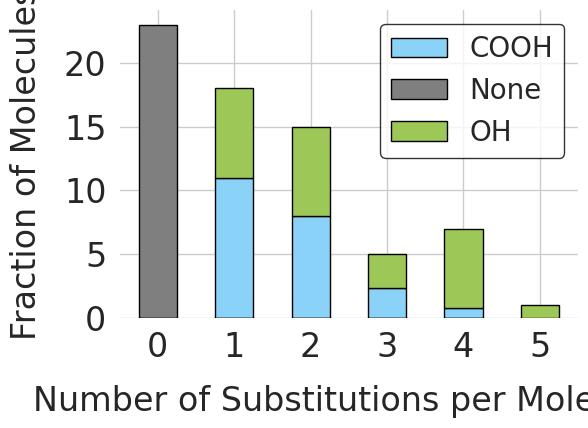

In [32]:
run ../src/data/make_TMS_derivative_v2-arom2.py -i '../data/raw/Franklin/goamazon_SMILES.csv' -o '../data/processed/franklin_goamazon_der2_arom-SMILES.csv'  

In [33]:
import pandas as pd

# --- Load your files ---
file1 = '../data/processed/franklin_goamazon_der2_arom-SMILES.csv' # replace with your path
file2 = '../data/NEIMS/Franklin_TMS-v2/SMILES_arom.csv'  # replace with your path

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

# --- Specify SMILES column ---
smiles_col = 'SMILES'  # change if needed

# --- Compare exact values, including NaNs ---
if df1['Modified_SMILES'].equals(df2[smiles_col]):
    print("SMILES columns are exactly the same!")
else:
    print("SMILES columns are NOT the same.")

# --- Check equality row by row ---
differences = df1['Modified_SMILES'] != df2[smiles_col]

if differences.any():
    print("SMILES columns are NOT the same.\n")
    diff_rows = differences[differences].index
    for i in diff_rows:
        val1 = df1.at[i, 'Modified_SMILES']
        val2 = df2.at[i, smiles_col]
        print(f"Row {i}: file1 -> {val1} | file2 -> {val2}")
else:
    print("SMILES columns are exactly the same!")


SMILES columns are NOT the same.
SMILES columns are NOT the same.

Row 3: file1 -> Nc1ccc2nc3ccccc3c2c1 | file2 -> NC1=CC2=C(C=C1)NC3=C2C=CC=C3
Row 58: file1 -> c1ccc2nccc2c1 | file2 -> C12=C(NC=C2)C=CC=C1


In [34]:
df1[['Original_SMILES', 'Modified_SMILES']]

,Original_SMILES,Modified_SMILES
0,C=CC(CC/C=C(C)/CC/C=C(C)/CCC=C(C)C)=C,CC(C)=CCC/C(C)=C/CC/C(C)=C/CCC(=C)C=C
1,O=C(C(C=CC(C)=O)(C)C(C)(C)CC1)C21CO2,CC(=O)C=CC1(C)C(=O)C2(CCC1(C)C)CO2
2,O=C1O[C@@]2(C)C(C(C)(C)CCC2)=C1,CC1(C)CCC[C@@]2(C)OC(=O)C=C12
3,NC1=CC2=C(C=C1)NC3=C2C=CC=C3,Nc1ccc2nc3ccccc3c2c1
4,CC(C)CCCC(C)CCCC1(C)CCC(O1)=O,CC(C)CCCC(C)CCCC1(C)CCC(=O)O1
...,...,...
64,O=C1CC[C@@H](C(O)=O)N1,C[Si](C)(C)OC(=O)C1CCC(=O)N1
65,O=C(OCC(C)CC)C1=CC=CC=C1C(OCCC)=O,CCCOC(=O)C1=CC=CC=C1C(=O)OCC(C)CC
66,O=C(C1=CC=CC=C1C(O)=O)O,C[Si](C)(C)OC(=O)C1=CC=CC=C1C(=O)O[Si](C)(C)C
67,OC1=CC=C(C(O)CO)C=C1OC,COC1=CC(C(CO[Si](C)(C)C)O[Si](C)(C)C)=CC=C1O[S...


In [35]:
der2_goamazon = pd.read_csv('../data/processed/franklin_goamazon_der2_arom-SMILES.csv')

In [36]:
der2_goamazon = der2_goamazon.reset_index(drop=True)
goamazon_data = goamazon_data.reset_index(drop=True)
s1 = der2_goamazon['Total_Replacements'].reset_index(drop=True)
s2 = goamazon_data['TMS'].reset_index(drop=True)

# Element-wise comparison (returns a Series of True/False for each row)
comparison = s1 == s2
print("Row-wise equality:")
print(comparison)

# Percentage of equality
percentage_equal = comparison.mean() * 100
print(f"\nPercentage of equality: {percentage_equal:.2f}%")

# Find all mismatched rows
mismatches = s1[~comparison]
mismatched_s2 = s2[~comparison]

if not mismatches.empty:
    print("\nMismatched rows:")
    for reset_index in mismatches.index:
        # Map reset indices back to the original indices
        original_index = der_goamazon.index[reset_index]
        
        # Retrieve original 'SMILES' from the DataFrames
        smiles1 = der_goamazon.loc[original_index, 'Modified_SMILES']
        smiles2 = goamazon_data.loc[original_index, 'SMILES']

        # Print mismatch details
        print(f"Index {reset_index} (original index {original_index}): s1 (sim) = {mismatches.loc[reset_index]}, "
              f"s2 (real) = {mismatched_s2.loc[reset_index]}, SMILES s1 (sim) = {smiles1}, SMILES s2 (real) = {smiles2}")
else:
    print("\nNo mismatches found.")


Row-wise equality:
0      True
1      True
2      True
3      True
4      True
      ...  
64     True
65     True
66    False
67     True
68     True
Length: 69, dtype: bool

Percentage of equality: 95.65%

Mismatched rows:
Index 7 (original index 7): s1 (sim) = 1, s2 (real) = 0.0, SMILES s1 (sim) = CC1CC(OC(=O)c2ccccc2O[Si](C)(C)C)CC(C)(C)C1, SMILES s2 (real) = O=C(OC1CC(C)(C)CC(C)C1)C2=CC=CC=C2O
Index 29 (original index 29): s1 (sim) = 1, s2 (real) = 0.0, SMILES s1 (sim) = COc1cc(OC)c(C(C)=O)c(O[Si](C)(C)C)c1, SMILES s2 (real) = OC1=CC(OC)=CC(OC)=C1C(C)=O
Index 66 (original index 66): s1 (sim) = 2, s2 (real) = 0.0, SMILES s1 (sim) = C[Si](C)(C)OC(=O)c1ccccc1C(=O)O[Si](C)(C)C, SMILES s2 (real) = O=C(C1=CC=CC=C1C(O)=O)O


# Functional groups in non-substituted molecules

In [47]:
#load openbabel
#export PYTHONPATH=$PYTHONPATH:/scratch/project_2006752/hsandstr/Project/EIMS/Dataset_analysis/src/aprl_ssp

In [43]:
run ../src/features/generate_simpol_groups.py  -s 'franklin_goamazon_der2_arom-SMILES.csv' -c Original_SMILES -d ../data/processed/ -o ../data/processed/franklin_SIMPOL_original.csv


ModuleNotFoundError: No module named 'openbabel'

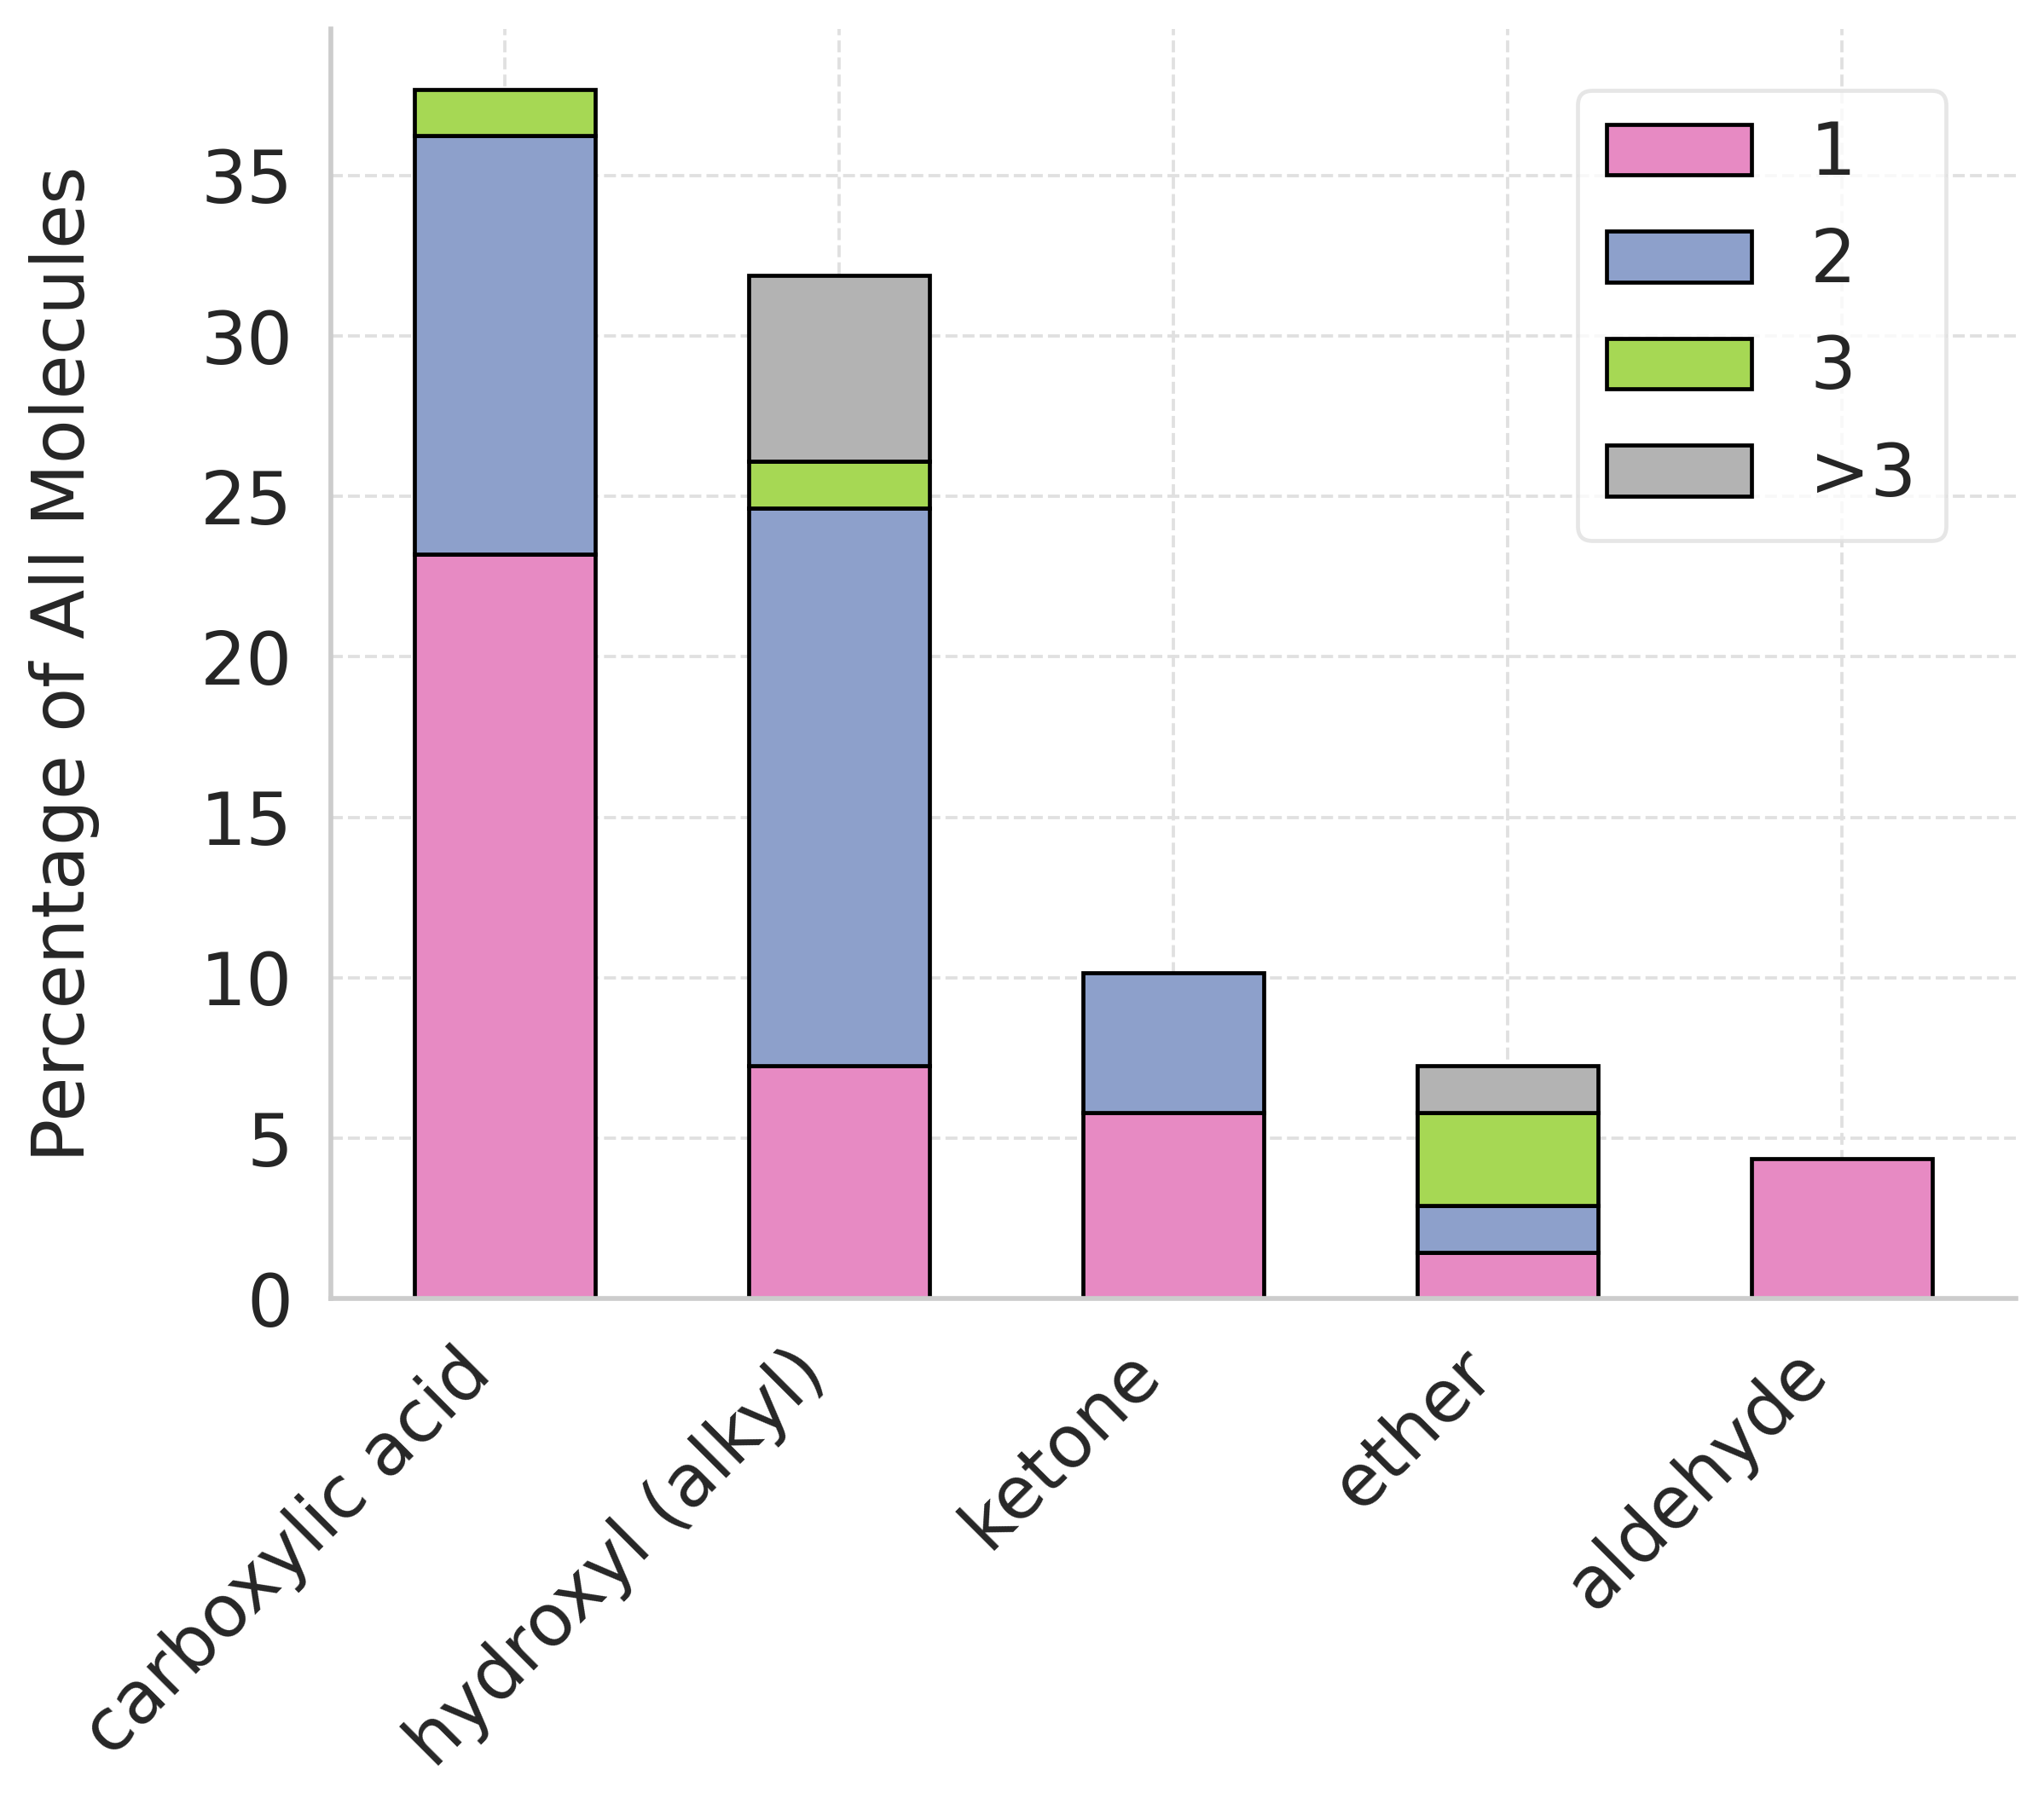

In [61]:

# --- Load original SIMPOL counts ---
fun_groups_orig = pd.read_csv("../data/processed/franklin_SIMPOL_original.csv")



# --- Columns to exclude from functional group analysis ---
non_fun_cols = ['monoisotopic_mass', 'SMILES', 'molar_mass', 'atom_count',
                'oxygen_count', 'aromatic_ring', 'non_aromatic_ring',
                'carbon number', 'fingerprint',
                "C=C (non-aromatic)", "ester, all", "C=C-C=O in non-aromatic ring",
                "ether, aromatic", "ether (alicyclic)"]

# Select only actual functional groups
fun_group_cols = [col for col in fun_groups_orig.columns
                  if col not in non_fun_cols
                  and col != "carbonyl"
                  and "CH" not in col
                  and "aromatic" not in col
                  and "secondary" not in col
                  and "nC-OHside-a" not in col]

# Count how many molecules contain each group
group_presence = (fun_groups_orig[fun_group_cols] > 0).sum()
top5 = group_presence.sort_values(ascending=False).head(5).index

# Total molecules
n_total = len(fun_groups_orig)

# Prepare stacked fractions of dataset
bin_labels = ['1', '2', '3', '>3']
stacked_absolute = pd.DataFrame(index=top5, columns=bin_labels)

for group in top5:
    series = fun_groups_orig[group]
    filtered = series[series > 0]

    counts = {
        '1': (filtered == 1).sum(),
        '2': (filtered == 2).sum(),
        '3': (filtered == 3).sum(),
        '>3': (filtered > 3).sum()
    }

    # Normalize by total dataset
    stacked_absolute.loc[group] = [v / n_total * 100 for v in counts.values()]

# --- Plot Functional Group Distribution ---
colors = ['#E78AC3', '#8DA0CB', '#A6D854', '#B3B3B3']  # pink, blue, green, gray

fig, ax = plt.subplots(figsize=(7, 6))  # create figure + axes

stacked_absolute = stacked_absolute.astype(float)
stacked_absolute.plot(
    kind='bar',
    stacked=True,
    color=colors,
    width=0.54,
    edgecolor='black',
    ax=ax
)

# Axis labels and ticks
ax.set_ylabel("Percentage of All Molecules", labelpad=25)
ax.set_xticklabels(stacked_absolute.index, rotation=45, ha='right')

# Legend inside plot
ax.legend(title=None, loc='upper right', bbox_to_anchor=(0.98, 0.98), frameon=True)

# Adjust margins to prevent clipping
fig.subplots_adjust(top=0.88, right=0.95, left=0.12, bottom=0.15)

# Save figure
fig.savefig('fungroups_franklin_original.png', dpi=500, bbox_inches='tight')
plt.show()


# Some double checking

In [39]:
import pandas as pd
import os

# --- Paths ---
arom_file = '../data/NEIMS/Franklin_TMS-v2/SMILES_arom.csv'
base_dir = '../data/NEIMS/Franklin_TMS-v2/'  # parent directory containing 0000, 0001, ..., 0068

# --- Load arom SMILES ---
df_arom = pd.read_csv(arom_file)
smiles_arom = df_arom['SMILES'].tolist()

# --- Compare row by row ---
for i, arom_smiles in enumerate(smiles_arom):
    folder = os.path.join(base_dir, f"{i:04d}")
    file_path = os.path.join(folder, "smiles.csv")

    if not os.path.exists(file_path):
        print(f"Row {i}: ❌ File {file_path} does not exist")
        continue

    # read SMILES (no header)
    df_row = pd.read_csv(file_path, header=None)
    row_smiles = df_row.iloc[0, 0]

    if arom_smiles == row_smiles:
        print(f"Row {i}: ✅ SMILES match")
    else:
        print(f"Row {i}: ❌ SMILES differ")
        print(f"  SMILES_arom.csv -> {arom_smiles}")
        print(f"  {i:04d}/smiles.csv -> {row_smiles}")


Row 0: ✅ SMILES match
Row 1: ✅ SMILES match
Row 2: ✅ SMILES match
Row 3: ✅ SMILES match
Row 4: ✅ SMILES match
Row 5: ✅ SMILES match
Row 6: ✅ SMILES match
Row 7: ✅ SMILES match
Row 8: ✅ SMILES match
Row 9: ✅ SMILES match
Row 10: ✅ SMILES match
Row 11: ✅ SMILES match
Row 12: ✅ SMILES match
Row 13: ✅ SMILES match
Row 14: ✅ SMILES match
Row 15: ✅ SMILES match
Row 16: ✅ SMILES match
Row 17: ✅ SMILES match
Row 18: ✅ SMILES match
Row 19: ✅ SMILES match
Row 20: ✅ SMILES match
Row 21: ✅ SMILES match
Row 22: ✅ SMILES match
Row 23: ✅ SMILES match
Row 24: ✅ SMILES match
Row 25: ✅ SMILES match
Row 26: ✅ SMILES match
Row 27: ✅ SMILES match
Row 28: ✅ SMILES match
Row 29: ✅ SMILES match
Row 30: ✅ SMILES match
Row 31: ✅ SMILES match
Row 32: ✅ SMILES match
Row 33: ✅ SMILES match
Row 34: ✅ SMILES match
Row 35: ✅ SMILES match
Row 36: ✅ SMILES match
Row 37: ✅ SMILES match
Row 38: ✅ SMILES match
Row 39: ✅ SMILES match
Row 40: ✅ SMILES match
Row 41: ✅ SMILES match
Row 42: ✅ SMILES match
Row 43: ✅ SMILES matc

In [40]:
df1

,Original_SMILES,Modified_SMILES,Total_Replacements,OH,SH,Primary_Amine,Secondary_Amine,Imine,OOH,COOH
0,C=CC(CC/C=C(C)/CC/C=C(C)/CCC=C(C)C)=C,CC(C)=CCC/C(C)=C/CC/C(C)=C/CCC(=C)C=C,0,0,0,0,0,0,0,0
1,O=C(C(C=CC(C)=O)(C)C(C)(C)CC1)C21CO2,CC(=O)C=CC1(C)C(=O)C2(CCC1(C)C)CO2,0,0,0,0,0,0,0,0
2,O=C1O[C@@]2(C)C(C(C)(C)CCC2)=C1,CC1(C)CCC[C@@]2(C)OC(=O)C=C12,0,0,0,0,0,0,0,0
3,NC1=CC2=C(C=C1)NC3=C2C=CC=C3,Nc1ccc2nc3ccccc3c2c1,0,0,0,0,0,0,0,0
4,CC(C)CCCC(C)CCCC1(C)CCC(O1)=O,CC(C)CCCC(C)CCCC1(C)CCC(=O)O1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
64,O=C1CC[C@@H](C(O)=O)N1,C[Si](C)(C)OC(=O)C1CCC(=O)N1,1,0,0,0,0,0,0,1
65,O=C(OCC(C)CC)C1=CC=CC=C1C(OCCC)=O,CCCOC(=O)C1=CC=CC=C1C(=O)OCC(C)CC,0,0,0,0,0,0,0,0
66,O=C(C1=CC=CC=C1C(O)=O)O,C[Si](C)(C)OC(=O)C1=CC=CC=C1C(=O)O[Si](C)(C)C,2,0,0,0,0,0,0,2
67,OC1=CC=C(C(O)CO)C=C1OC,COC1=CC(C(CO[Si](C)(C)C)O[Si](C)(C)C)=CC=C1O[S...,3,3,0,0,0,0,0,0


In [41]:
df2

,SMILES
0,CC(C)=CCC/C(C)=C/CC/C(C)=C/CCC(=C)C=C
1,CC(=O)C=CC1(C)C(=O)C2(CCC1(C)C)CO2
2,CC1(C)CCC[C@@]2(C)OC(=O)C=C12
3,NC1=CC2=C(C=C1)NC3=C2C=CC=C3
4,CC(C)CCCC(C)CCCC1(C)CCC(=O)O1
...,...
64,C[Si](C)(C)OC(=O)C1CCC(=O)N1
65,CCCOC(=O)C1=CC=CC=C1C(=O)OCC(C)CC
66,C[Si](C)(C)OC(=O)C1=CC=CC=C1C(=O)O[Si](C)(C)C
67,COC1=CC(C(CO[Si](C)(C)C)O[Si](C)(C)C)=CC=C1O[S...
